# Auto-Encoder, AE
- oversampling 방법 : Auto-Encoder. smoothing, random sampling
- 차원 축소 알고리즘으로 활용될 수 있다
- 입력 데이터의 특징을 효율적으로 담아낸 이미지를 생성(GAN은 새로운 이미지를 만들지만, AE는 입력 데이터의 특성을 가진 이미지 생성)
- 데이터 수가 충분하지 못한 분야에서 사용될 수 있다

- 인코더 부분만 사용해서 차원 축소 알고리즘으로 사용
- 디코더 부분을 사용하여 이미지 생성 모델을 사용 할 수 있다
- 비지도 학습 : X,X' 사이의 제곱 평균 제곱근
- 지도 학습   : 출력값에 대한 크로스 엔트로피 손실 함수


- encoding network
- decoding network

In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D,Reshape,Input,Flatten
import matplotlib.pyplot as plt
import numpy as np


In [9]:
## mnist불러오기
(X_train,_),(X_test,_)=mnist.load_data()   
X_train = X_train.reshape(X_train.shape[0],28,28,1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0],28,28,1).astype('float32') / 255

## 생성자 모델을 만들기
autoencoder= Sequential()

## 인코딩 부분
autoencoder.add(Conv2D(16,kernel_size=3,padding='same', input_shape=(28,28,1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2,padding='same'))
autoencoder.add(Conv2D(8,kernel_size=3,padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu'))

## 디코딩 부분
autoencoder.add(Conv2D(8,kernel_size=3,padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8,kernel_size=3,padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16,kernel_size=3, activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1,kernel_size=3,padding='same', activation='sigmoid'))

## 전체 구조를 확인
autoencoder.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 conv2d_10 (Conv2D)          (None, 4, 4, 8)          

Epoch 1/50
469/469 [==============================] - 37s 77ms/step - loss: 0.0850 - val_loss: 0.0827
Epoch 2/50
469/469 [==============================] - 69s 147ms/step - loss: 0.0837 - val_loss: 0.0827
Epoch 3/50
469/469 [==============================] - 40s 84ms/step - loss: 0.0836 - val_loss: 0.0826
Epoch 4/50
469/469 [==============================] - 42s 89ms/step - loss: 0.0836 - val_loss: 0.0824
Epoch 5/50
469/469 [==============================] - 49s 105ms/step - loss: 0.0835 - val_loss: 0.0825
Epoch 6/50
469/469 [==============================] - 46s 99ms/step - loss: 0.0834 - val_loss: 0.0823
Epoch 7/50
469/469 [==============================] - 35s 74ms/step - loss: 0.0833 - val_loss: 0.0821
Epoch 8/50
469/469 [==============================] - 35s 75ms/step - loss: 0.0832 - val_loss: 0.0821
Epoch 9/50
469/469 [==============================] - 41s 87ms/step - loss: 0.0831 - val_loss: 0.0825
Epoch 10/50
469/469 [==============================] - 35s 75ms/step - loss: 0.0

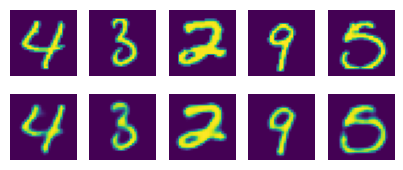

In [11]:
## 컴파일 및 학습
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')
autoencoder.fit(X_train,X_train, epochs=50,batch_size=128,validation_data=(X_test,X_test))

## 학습결과 출력
random_test= np.random.randint(X_test.shape[0],size=5)

## 테스트 이미지 랜덤 포출
ae_imgs= autoencoder.predict(X_test)

plt.figure(figsize=(7,2))

for i, image_idx in enumerate(random_test):    #랜덤하게 뽑은 이미지를 차례로 나열합니다.
   ax = plt.subplot(2, 7, i + 1) 
   plt.imshow(X_test[image_idx].reshape(28, 28))  #테스트할 이미지를 먼저 그대로 보여줍니다.
   ax.axis('off')
   ax = plt.subplot(2, 7, 7 + i +1)
   plt.imshow(ae_imgs[image_idx].reshape(28, 28))  #오토인코딩 결과를 다음열에 출력합니다.
   ax.axis('off')
plt.show()
